# Aggregate multiple datasets to one

Thsi section defines some stuff for running the script. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# For all files in results/mcq_results/irrelevant/aligner/full, if is csv, call extend_irrelevant()
from results_helper import extend_irrelevant
import os

for f in os.listdir("results/mcq_results/irrelevant/aligner/full"):
    if f.endswith(".csv") and not f.endswith("aligner-full_eval.csv"):
        print(f)
        extend_irrelevant(f"results/mcq_results/irrelevant/aligner/full/{f}")
        print("done")
    else:
        print(f"skipping {f}")

Mistral-7B-Instruct-v0.3.csv
done
Qwen3-8B.csv
done
skipping janus-7b-aligner-full_eval.csv
skipping Llama-3.1-8B-Instruct-aligner-full_eval.csv
skipping Mistral-7B-Instruct-v0.3-aligner-full_eval.csv
Llama-3.3-70B-Instruct-Turbo-Free.csv
done
skipping Mixtral-8x7B-Instruct-v0.1-aligner-full_eval.csv
gemma-2-9b-it.csv
done
Llama-3.1-8B-Instruct.csv
done
skipping Llama-3.3-70B-Instruct-Turbo-Free-aligner-full_eval.csv
skipping Qwen3-8B-aligner-full_eval.csv
Mixtral-8x7B-Instruct-v0.1.csv
done
janus-7b.csv
done
skipping gemma-2-9b-it-aligner-full_eval.csv


In [3]:
import os
import itertools
import numpy as np
import pandas as pd

from results_helper import (
    MODELS, 
    MODELS_FULL,
    MODELS_SHORT,
    PROMPT_METHODS,
    PROMPT_METHODS_WITHOUT_ALIGNER,
    DATASETS,
    DATASETS_FULL,
    DATASET_LENS,
    DATASET_SHORT_DICT,
    TARGET_DATASET,
    ROBUST_PATH,
    DATASET_PREFERENCES,
    METRICS,
    METRIC_LABELS,
    RELEVANCE, 
    RELEVANCE_DICT, 
)

from results_helper import aggregate, split_to_df_by_dataset
results_dict = aggregate(relevance=["relevant", "irrelevant", "irrelevant_set"], verbose=False, use_eval=True)

Found 59/195 full datasets


In [4]:
results_dict = split_to_df_by_dataset(results_dict, verbose=True)
print(results_dict)
results_dict.print_data()

MultiKeyDict with 431 entries:
Custom Keys: ['relevance', 'method', 'model', 'dataset', 'field']
Categorical Fields:
  - relevance(3): ['relevant', 'irrelevant_set', 'irrelevant']
  - method(5): ['direct', 'cot', 'icl', 'self_critic', 'aligner']
  - model(13): ['Llama-3.1-8B-Instruct', 'Llama-3.3-70B-Instruct-Turbo-Free', 'Mistral-7B-Instruct-v0.3', 'janus-7b', 'Mixtral-8x7B-Instruct-v0.1', 'gpt-4o-mini-2024-07-18', 'DeepSeek-R1-Distill-Llama-70B-free', 'gemma-2-9b-it', 'gemma-2-27b-it', 'Qwen3-8B', 'Qwen3-8B_thinking', 'Qwen3-32B', 'Qwen3-32B_thinking']
  - dataset(4): ['commonsense_qa', 'mmlu', 'truthful_qa', 'full']
  - Fields(len 2): ['dataset_path', 'df']

Data:
  - ('relevant', 'direct', 'Llama-3.1-8B-Instruct', 'full', 'dataset_path'): results/mcq_results/relevant/direct/full/Llama-3.1-8B-Instruct-direct-full_eval.csv
  - ('relevant', 'direct', 'Llama-3.3-70B-Instruct-Turbo-Free', 'full', 'dataset_path'): results/mcq_results/relevant/direct/full/Llama-3.3-70B-Instruct-Turbo-Free

## Table of scores

BR = 1-(Robust(q, P) | Correct_no_pref(q))

RDR = 1-(Robust(q, P) / Correct_no_pref(q))

AFR = 1 - (Robust(q, P) / Correct_pref(q, P))

PVR = (Correct_nopref(q) & Correct_pref(q, P)) / (Correct_nopref(q) | Correct_pref(q, P))

Compute per model, per dataset and full dataset

In [5]:
from results_helper import (MODELS_SHORT_DICT, compute_metrics, print_metric_table)

# Compute metrics
results_dict = compute_metrics(results_dict, verbose=False)

# Debug print values
print_metric_table(
    results_dict,
    # relevances=["relevant"],
)


-------------------- ('relevant', 'Relevant') --------------------

-------------------- direct --------------------
Llama3-8B		& 11.8 & 12.8 & 2.0 & 19.2 & 18.0 & 23.4 & 9.7 & 30.8 & 18.1 & 19.9 & 4.4 & 28.2 & 16.8 & 20.9 & 7.6 & 28.3 \\
Llama3-70B		& \textbf{3.1} & \textbf{4.3} & \textbf{1.5} & \textbf{6.5} & \textbf{6.0} & \textbf{10.1} & 5.3 & \textbf{10.2} & \textbf{7.3} & \textbf{9.9} & 2.9 & \textbf{12.0} & \textbf{5.6} & \textbf{9.0} & 4.4 & \textbf{9.8} \\
Mistral-7B		& 20.5 & 27.5 & 8.8 & 25.5 & 27.3 & 34.4 & 13.2 & 37.2 & 32.2 & 42.8 & 15.2 & 36.6 & 26.3 & 33.8 & 12.4 & 34.6 \\
Janus-7B		& 14.2 & 29.9 & 19.0 & 40.4 & 24.7 & 34.7 & 18.3 & 48.5 & 19.8 & 43.5 & 28.4 & 39.7 & 21.9 & 34.6 & 19.5 & 45.9 \\
Mixtral-8x7B		& 12.5 & 17.8 & 6.8 & 19.1 & 18.2 & 27.0 & 13.6 & 27.6 & 19.9 & 34.2 & 19.0 & 24.8 & 17.3 & 26.1 & 12.9 & 25.6 \\
GPT-4o-mini		& 3.9 & 9.1 & 5.8 & 6.6 & 13.6 & 19.4 & 7.9 & 18.2 & 10.7 & 17.6 & 6.9 & 15.4 & 11.5 & 17.3 & 7.4 & 15.7 \\
DeepSeek-R1-70B		& 8.6 & 13.7

## Scatter Plot of AVF vs BR

(3, 13) ['field', 'model']
(3, 13) ['Llama3-8B', 'Llama3-70B', 'Mistral-7B', 'Janus-7B', 'Mixtral-8x7B', 'GPT-4o-mini', 'DeepSeek-R1-70B', 'Gemma-2-9B', 'Gemma-2-27B', 'Qwen3-8B', 'Qwen3-8B-Thinking', 'Qwen3-32B', 'Qwen3-32B-Thinking']
Modifying


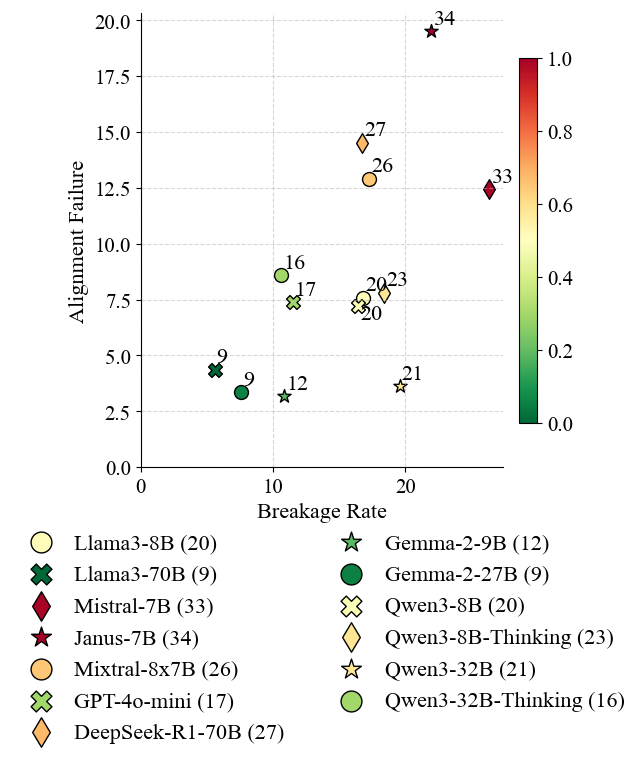

In [6]:
## TBD Code deleted by accident
from results_helper import filter_axis, named_scatter

scatter_metric_combos = [
    ("BR", "AFR", "RER")
]

for combo in scatter_metric_combos:
    metric1, metric2, metric3 = combo
    
    data, order = results_dict.get_field_matrix(
        field=[metric1, metric2, metric3],
        fixed_keys={
            "dataset": "full",
            "relevance": "relevant",
            "method": "direct",
        },
        axis_keys=["model"]
    )
    data = np.array(data)
    print(data.shape, order)
    
    data, _, scatter_model_names = filter_axis(
        data,
        axis=1,
        labels_to_filter=MODELS_SHORT,
    )
    print(data.shape, scatter_model_names)

    named_scatter(
        data[0],
        data[1],
        keys=scatter_model_names,
        title=f"{metric2} vs {metric1} Scatter Plot",
        xlabel=METRIC_LABELS[metric1],
        ylabel=METRIC_LABELS[metric2],
        scores=data[2],
        show=True,
    )

## Horizontal Bidirectional Bar Plot for Relevant/Mixed

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


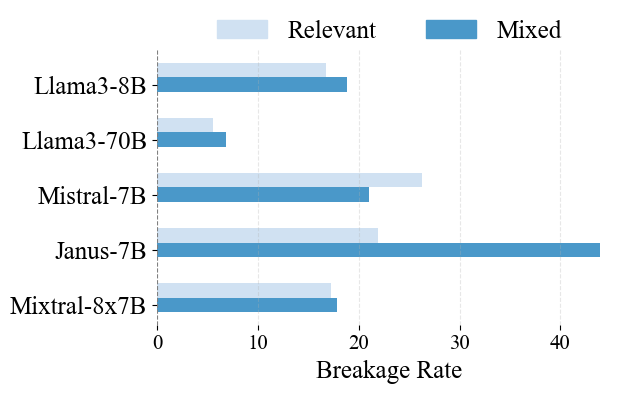

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


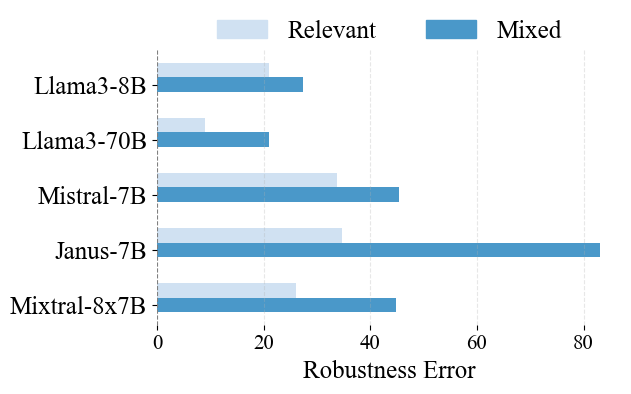

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


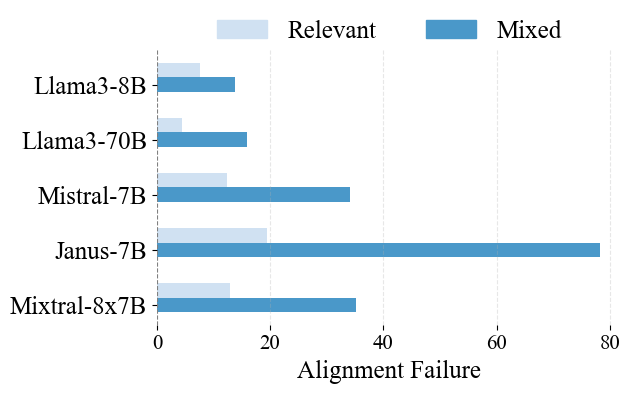

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


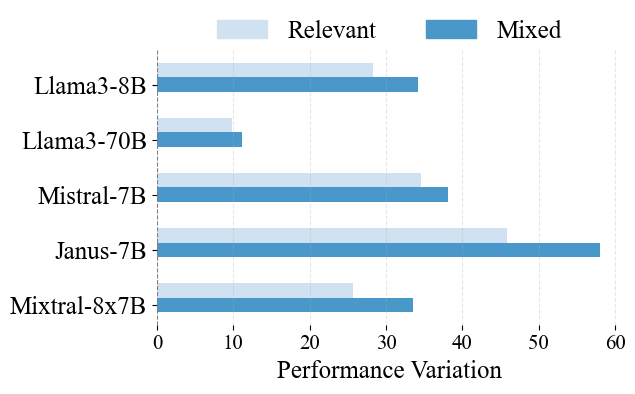

In [7]:
from results_helper import rel_irrel_backback_barplot, filter_axis, rel_irrel_topdown_barplot, relevance_hbarplot

matrices = []

for metric in METRICS:
    data, order = results_dict.get_field_matrix(
        field=metric,
        fixed_keys={
            "method": "direct",
            "dataset": "full",
        },
        axis_keys=["model", "relevance"]
    )
    data = np.array(data).squeeze()
    print(data.shape)
    data, _, model_names_rel_hb = filter_axis(
        data, 
        axis=0,
        filter_val=None,
        labels_to_filter=MODELS_SHORT,
    )
    print(data.shape)
    
    relevance_hbarplot(
        data[:, :2], 
        relevance_list=["relevant", "irrelevant_set"],
        models=model_names_rel_hb,
        title=f"{metric} by Relevance 2",
        xlabel=METRIC_LABELS[metric],
        figh=4,
        show=True
    )
    # rel_irrel_topdown_barplot(
    #     data[:, 0],
    #     data[:, 1],
    #     models=model_names_rel_hb,
    #     title=f"{metric} by Relevance",
    #     show=True,
    # )



## Horizontal Bar Plot for Relevant/Irrelevant/Mixed

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


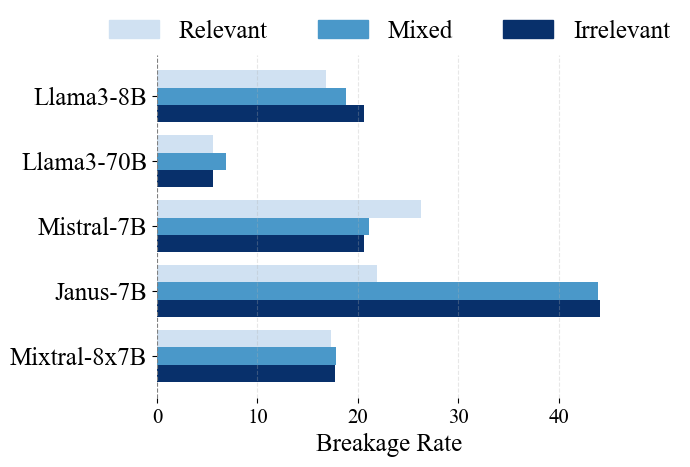

/Users/danielhou/Code/pref_aligner/results_helper.py:1240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


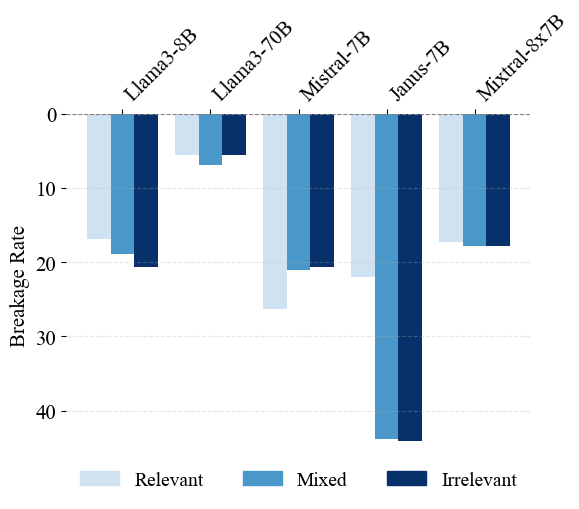

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


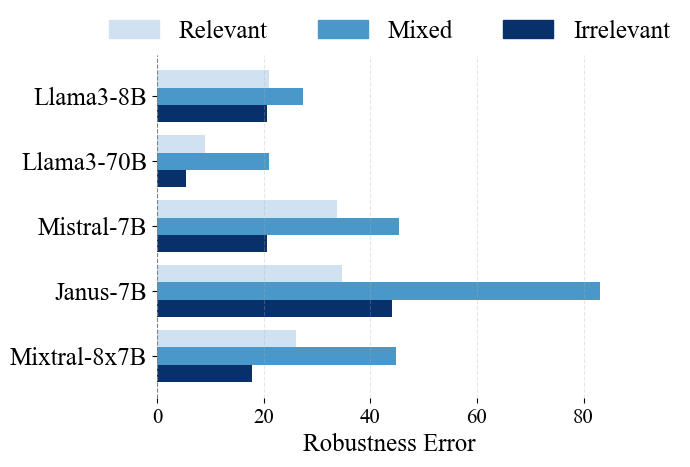

/Users/danielhou/Code/pref_aligner/results_helper.py:1240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


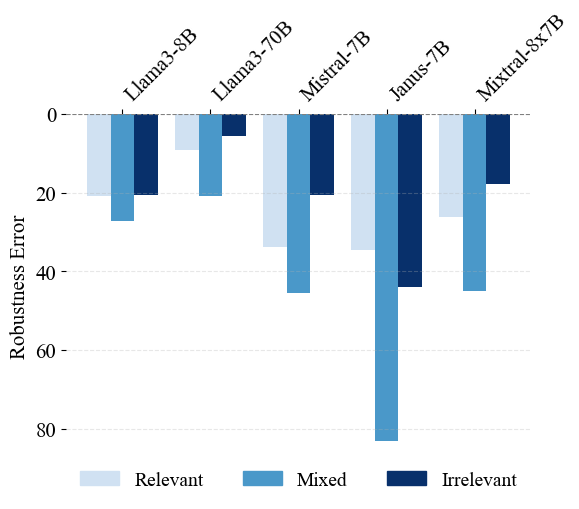

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


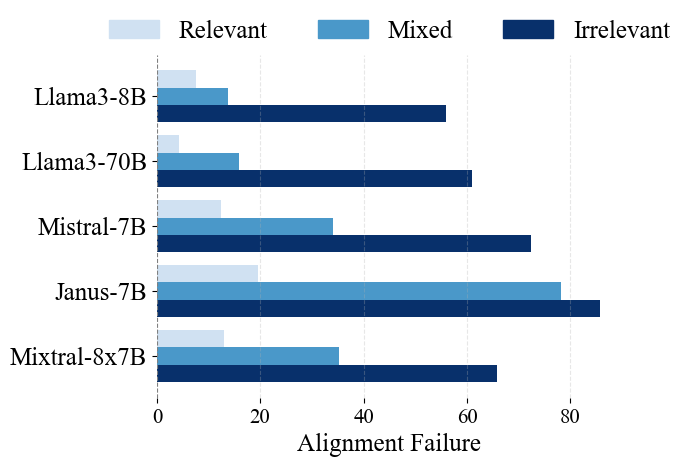

/Users/danielhou/Code/pref_aligner/results_helper.py:1240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


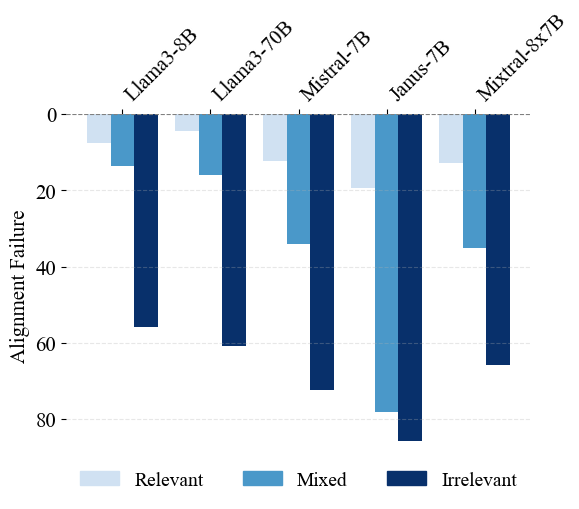

(13, 3)
(5, 3)


/Users/danielhou/Code/pref_aligner/results_helper.py:1144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


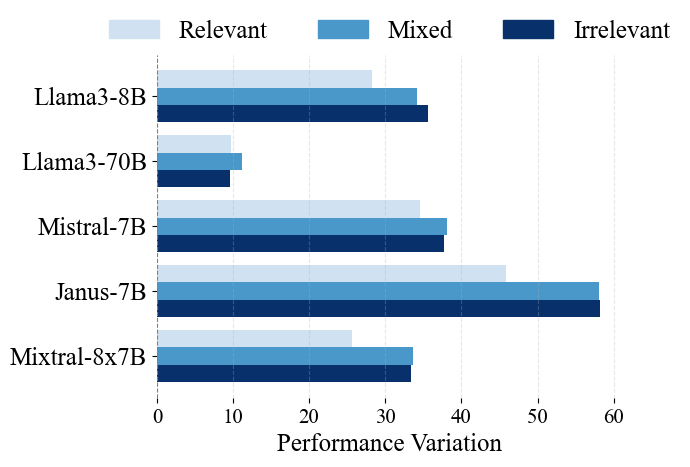

/Users/danielhou/Code/pref_aligner/results_helper.py:1240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


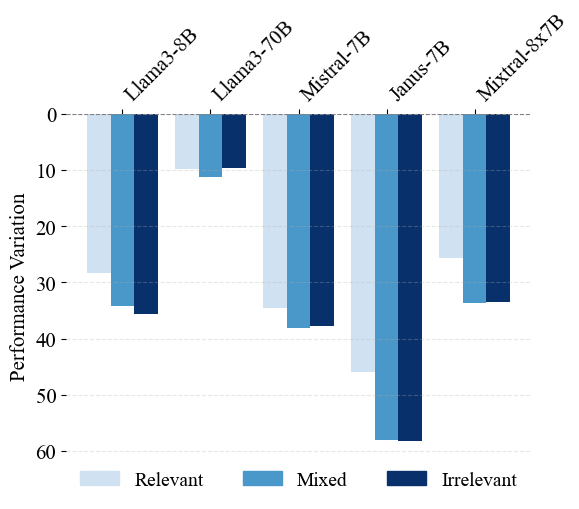

In [8]:
from results_helper import relevance_hbarplot, filter_axis, relevance_vbarplot

matrices = []

for metric in METRICS:
    data, order = results_dict.get_field_matrix(
        field=metric,
        fixed_keys={
            "method": "direct",
            "dataset": "full",
        },
        axis_keys=["model", "relevance"]
    )
    data = np.array(data).squeeze()
    print(data.shape)
    data, _, model_names_rel_hb = filter_axis(
        data, 
        axis=0,
        filter_val=None,
        labels_to_filter=MODELS_SHORT,
    )
    print(data.shape)
    
    relevance_hbarplot(
        data,
        relevance_list=RELEVANCE,
        models=model_names_rel_hb,
        title=f"{metric} by Relevance",
        xlabel=METRIC_LABELS[metric],
        show=True,
    )

    relevance_vbarplot(
        data,
        relevance_list=RELEVANCE,
        models=model_names_rel_hb,
        title=f"{metric} by Relevance",
        ylabel=METRIC_LABELS[metric],
        show=True,
    )



## Horizontal Bar Plot for Prompt Methods

(13, 5)
(4, 4)
(13, 5)
(4, 4)
(13, 5)
(4, 4)
Setting y-ticks


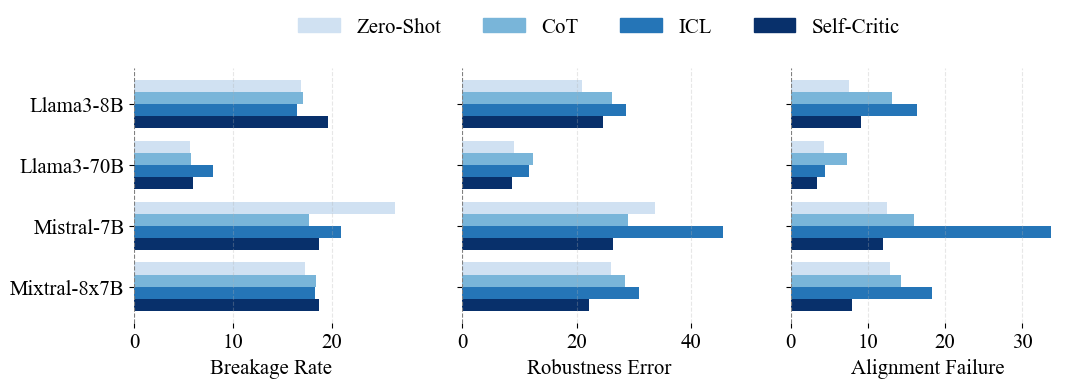

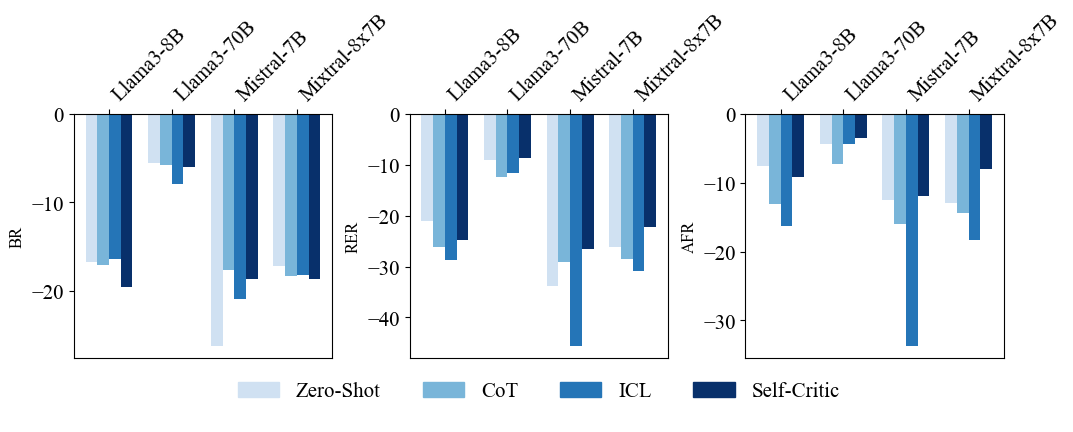

In [17]:
from results_helper import PROMPT_METHODS_WITHOUT_ALIGNER, method_hbarplot, method_vbarplot, filter_axis, PROMPT_METHODS_DICT

matrices = []

metrics_wo_pvr = ["BR", "RER", "AFR"]
for metric in metrics_wo_pvr:
    data, order = results_dict.get_field_matrix(
        field=metric,
        fixed_keys={
            "relevance": "relevant",
            "dataset": "full",
        },
        axis_keys=["model", "method"]
    )
    data = np.array(data).squeeze()
    print(data.shape)
    data = data[..., :-1]

    data, _, model_names_hb = filter_axis(
        data, 
        axis=0,
        filter_val=None,
        labels_to_filter=MODELS_SHORT,
    )
    print(data.shape)
    matrices.append(data)

method_hbarplot(
    matrices,
    methods=[PROMPT_METHODS_DICT[m] for m in PROMPT_METHODS_WITHOUT_ALIGNER],
    models=model_names_hb,
    subplot_titles=metrics_wo_pvr,
    title="Metrics with Various Prompting Methods",
    show=True,
)

method_vbarplot(
    matrices,
    methods=[PROMPT_METHODS_DICT[m] for m in PROMPT_METHODS_WITHOUT_ALIGNER],
    models=model_names_hb,
    subplot_titles=metrics_wo_pvr,
    title="Metrics with Various Prompting Methods",
    show=True,
)


## MC Return Valid Answer Drop in Probability

(2, 13)
[[ 0.4162042   0.04162042  0.8462819   1.8312986   0.87402886  3.135405
  21.947836    0.263596    0.4162042  10.474473   17.064373   11.792453  ]
 [ 0.72142065  0.09711432  1.2208657   2.691454    1.0127636   8.837403
  19.866816    0.7630411   0.7352941  10.668701   14.095449   17.216982  ]]
(2, 12)


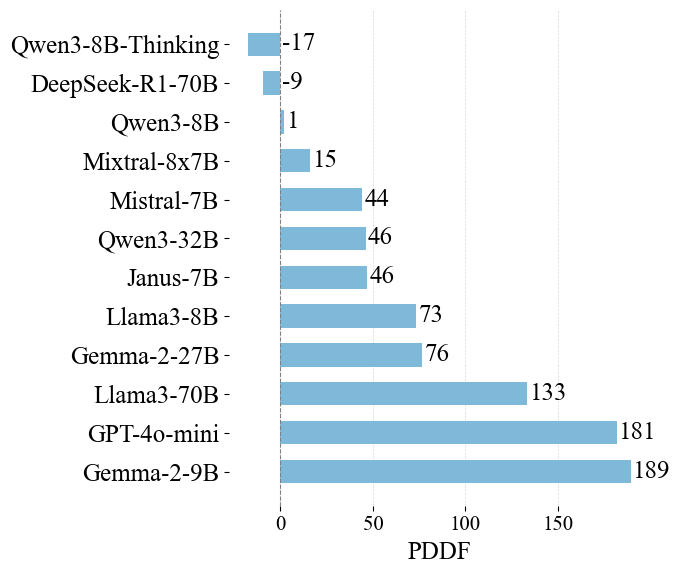

In [10]:
from results_helper import missing_answer_diffplot, filter_axis

data, order = results_dict.get_field_matrix(
    field=["NoPrefInvalid", "PrefInvalid"],
    fixed_keys={
        "dataset": "full",
        "method": "direct",
        "relevance": "relevant",
    },
    axis_keys=["model"]
)
data = np.array(data).squeeze()
print(data.shape)
data = data[:, :-1].astype(np.float32)
models_ref = MODELS[:-1].copy()
print(data)

# Filter by None
data, _, model_names_hb = filter_axis(
    data, 
    axis=0,
    filter_val=None,
    labels_to_filter=MODELS_SHORT,
)
# Filter by 0
data, _, model_names_hb = filter_axis(
    data, 
    axis=0,
    filter_val=0.0,
    labels_to_filter=model_names_hb,
)
print(data.shape)

# missing_answer_hbarplot(
#     data, 
#     keys=models_ref,
#     title="Missing Answer Rate by Model",
#     xlabel="Missing Answer Rate",
#     show=True
# )
low  = data[0, :]
high = data[1, :]
diff = ((high - low) / low * 100)[None]

missing_answer_diffplot(
    diff,
    keys=models_ref,
    title="PDDF by Model",
    xlabel="PDDF",
    show=True
)


## PVR Plot like the one above

(13,)


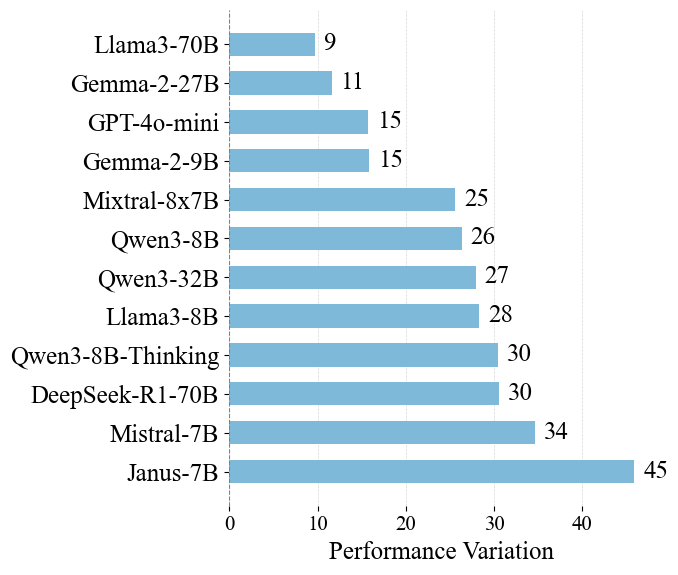

In [11]:
from results_helper import missing_answer_diffplot

data, order = results_dict.get_field_matrix(
    field=["PVR"],
    fixed_keys={
        "dataset": "full",
        "method": "direct",
        "relevance": "relevant",
    },
    axis_keys=["model"]
)
data = np.array(data).squeeze()
print(data.shape)
data = data[:-1].astype(np.float32)
models_ref = MODELS[:-1].copy()
data = data[None]

missing_answer_diffplot(
    data,
    keys=models_ref,
    title="PVR by Model",
    xlabel="Performance Variation",
    show=True
)


## Analyzing accuracy of sampled vs full preferences

1. Llama-3.1-8B
2. Janus-7B

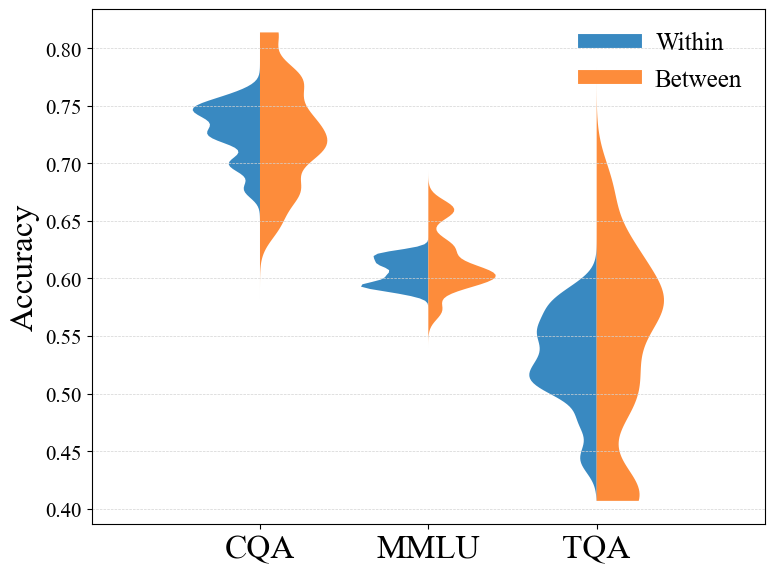

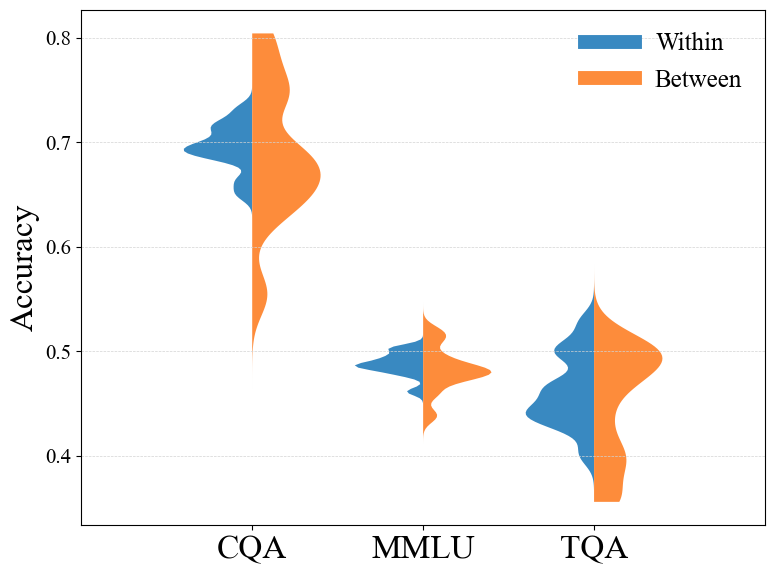

In [12]:
from results_helper import compare_profile_accuracy
# Llama-8B

llama_indiv_dataset_paths = [
    "Llama-3.1-8B-Instruct_final.csv",
    "Llama-3.1-8B-Instruct_0.8158839580640529_final.csv",
    "Llama-3.1-8B-Instruct_final.csv",
]

compare_profile_accuracy(
    "Llama-3.1-8B-Instruct",
    llama_indiv_dataset_paths,
    results_dict,
    show=True,
)

janus_indiv_dataset_paths = [
    "janus-7b_final.csv",
    "janus-7b_final.csv",
    "janus-7b_final.csv",
]

compare_profile_accuracy(
    "janus-7b",
    janus_indiv_dataset_paths,
    results_dict,
    show=True,
)

## Plot Aligner Improvements

(4, 13, 5)
(4, 4, 2)


/Users/danielhou/Code/pref_aligner/results_helper.py:2026: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


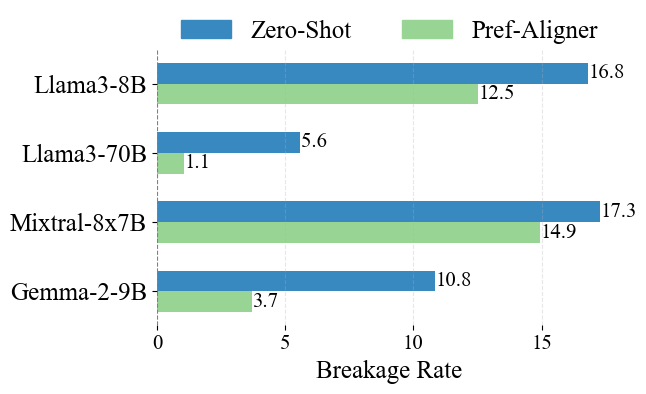

/Users/danielhou/Code/pref_aligner/results_helper.py:2130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


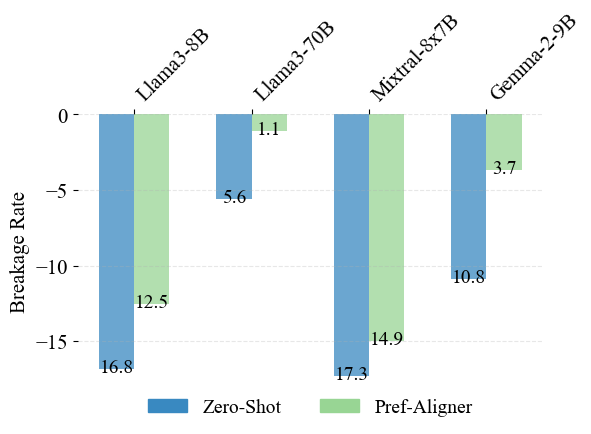

/Users/danielhou/Code/pref_aligner/results_helper.py:2026: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


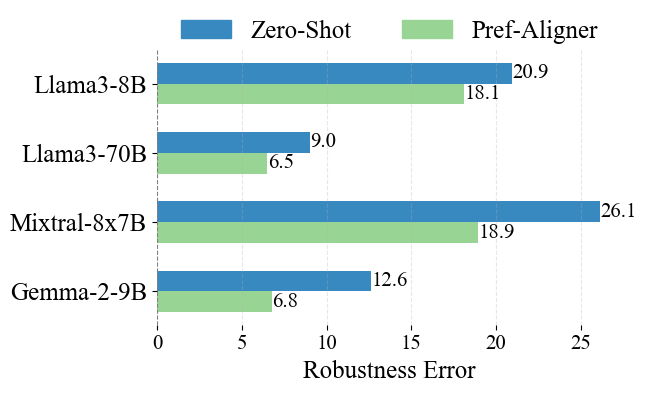

/Users/danielhou/Code/pref_aligner/results_helper.py:2130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


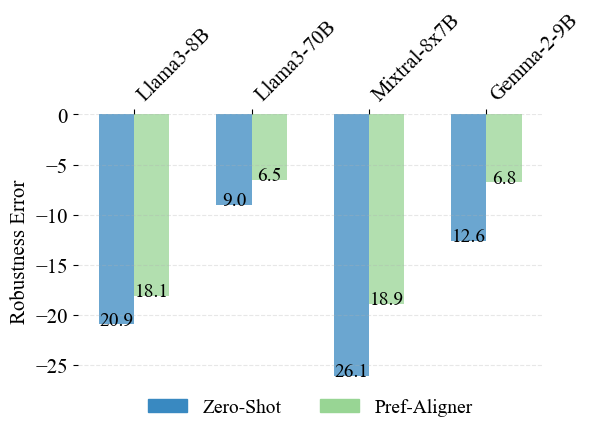

/Users/danielhou/Code/pref_aligner/results_helper.py:2026: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


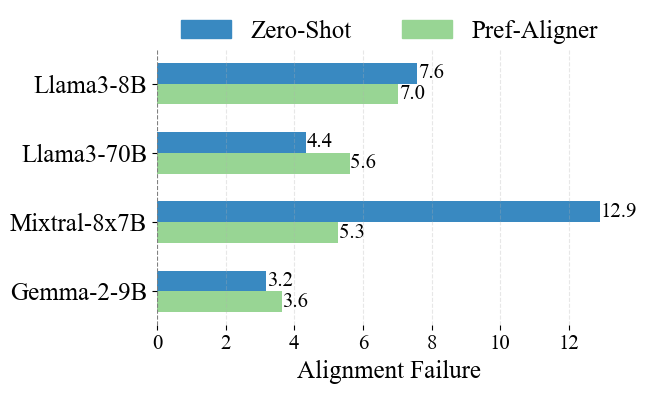

/Users/danielhou/Code/pref_aligner/results_helper.py:2130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


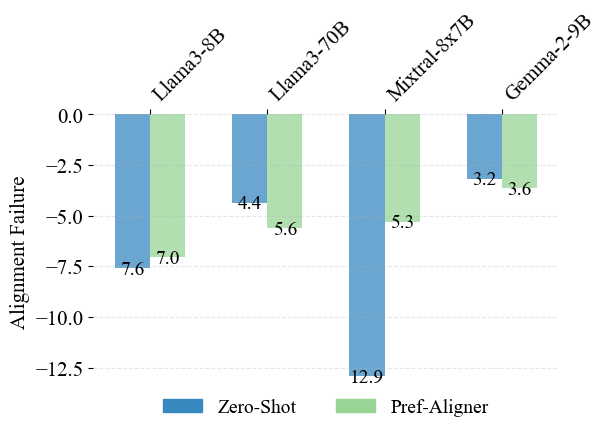

/Users/danielhou/Code/pref_aligner/results_helper.py:2026: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


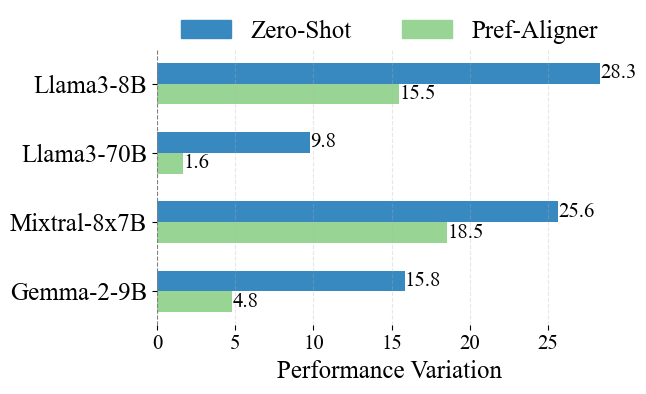

/Users/danielhou/Code/pref_aligner/results_helper.py:2130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


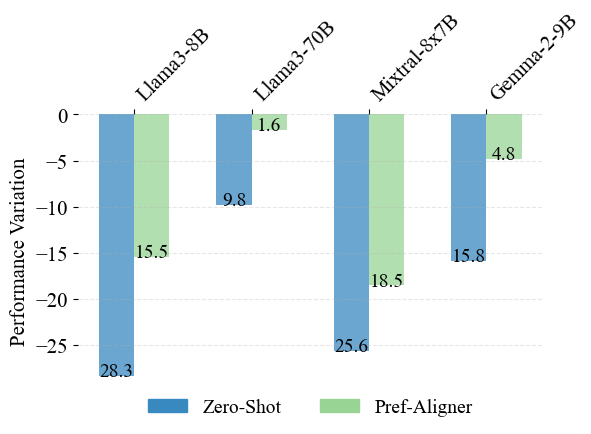

In [13]:
from results_helper import (
    aligner_improvement_hbarplot_full,
    aligner_improvement_hbarplot,
    aligner_improvement_vbarplot,
    PROMPT_METHODS_DICT,
    MODELS_SHORT_DICT
)

metrics_baseline = ["BR", "RER", "AFR", "PVR"]
data, order = results_dict.get_field_matrix(
    field=metrics_baseline,
    fixed_keys={
        "dataset": "full",
        "relevance": "relevant",
    },
    axis_keys=["model", "method"]
)
data = np.array(data)       # [fields x models x methods]
print(data.shape)
# Take the first 5
# data = data[:, :4]
# models_ref = MODELS[:4].copy()
data = np.stack([data[:, i] for i in [0, 1, 4, 7]], axis=1)
models_ref = [
    "Llama-3.1-8B-Instruct", 
    "Llama-3.3-70B-Instruct-Turbo-Free", 
    "Mixtral-8x7B-Instruct-v0.1", 
    "gemma-2-9b-it"
]
data = np.stack([data[..., i] for i in [0, -1]], axis=-1)
print(data.shape)       # [fields x models x methods]

# improvement = (data[...,0] - data[...,-1]).astype(np.float32)
# print(improvement.shape)    # improvement = [fields, models]

# from results_helper import METRIC_LABELS_ABBR

# data2plot = improvement.T
# relevance_hbarplot(
#     data2plot,
#     relevance_list=metrics_baseline,
#     models=[MODELS_SHORT_DICT[m] for m in models_ref],
#     title="Error Percentage Drop by Model",
#     xlabel="Error % Drop",
#     label_dict=METRIC_LABELS_ABBR,
#     figh=6,
#     show=True,
# )

# for i, metric in enumerate(metrics_baseline):
# aligner_improvement_hbarplot_full(
#     data[...,0].T,
#     data[...,-1].T,
#     models=[MODELS_SHORT_DICT[m] for m in models_ref],
#     metrics=metrics_baseline,
#     title=f"Aligner Improvement by Model Relevant",
#     show=True,
# )

for i, metric in enumerate(metrics_baseline):
    aligner_improvement_hbarplot(
        data[i],
        methods=["direct", "aligner"],
        label_dict=PROMPT_METHODS_DICT,
        models=[MODELS_SHORT_DICT[m] for m in models_ref],
        title=f"Aligner improvement in {metric}",
        xlabel=METRIC_LABELS[metric],
        show=True,
    )

    aligner_improvement_vbarplot(
        data[i],
        methods=["direct", "aligner"],
        label_dict=PROMPT_METHODS_DICT,
        models=[MODELS_SHORT_DICT[m] for m in models_ref],
        title=f"Aligner improvement in {metric}",
        ylabel=METRIC_LABELS[metric],
        figh=4,
        show=True,
    )


(4, 13, 5)
(4, 3, 2)
[[[np.float64(18.84227794703539) np.float64(11.951488423373757)]
  [np.float64(6.886383347788383) np.float64(1.2085635359115998)]
  [np.float64(17.81484167270969) np.float64(14.897868561278859)]]

 [[np.float64(27.30255448793063) np.float64(17.133406835722166)]
  [np.float64(20.919340849956637) np.float64(6.767955801104975)]
  [np.float64(44.863427604544356) np.float64(18.872113676731793)]]

 [[np.float64(13.7098664166862) np.float64(6.306504961411241)]
  [np.float64(15.871639202081521) np.float64(5.697513812154698)]
  [np.float64(35.170413343002174) np.float64(5.261989342806395)]]

 [[np.float64(34.20102603078092) np.float64(14.87955659774035)]
  [np.float64(11.14053964575401) np.float64(1.852487135505998)]
  [np.float64(33.58077749560461) np.float64(18.60267572733064)]]]


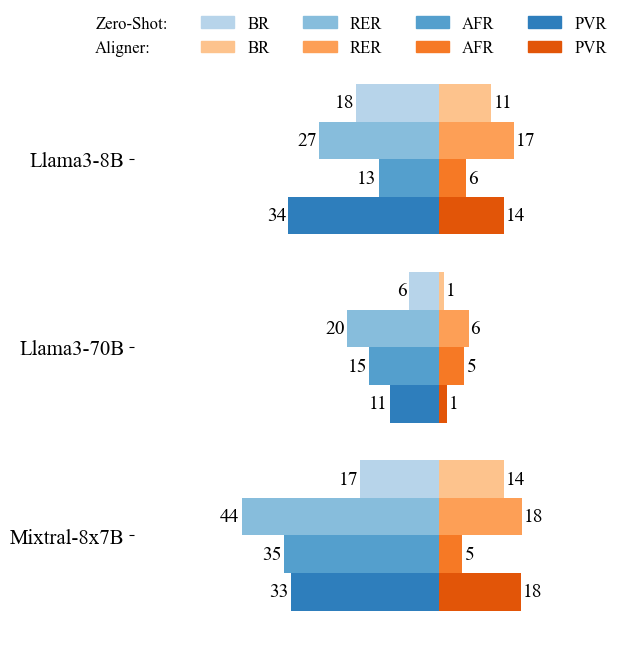

(<Figure size 500x800 with 2 Axes>, <Axes: >)

In [14]:

metrics_baseline = ["BR", "RER", "AFR", "PVR"]
data, order = results_dict.get_field_matrix(
    field=metrics_baseline,
    fixed_keys={
        "dataset": "full",
        "relevance": "irrelevant_set",
    },
    axis_keys=["model", "method"]
)
data = np.array(data)
print(data.shape)
data = np.stack([data[:, i] for i in [0, 1, 4]], axis=1)
models_ref = [
    "Llama-3.1-8B-Instruct", 
    "Llama-3.3-70B-Instruct-Turbo-Free", 
    "Mixtral-8x7B-Instruct-v0.1", 
    # "janus-7b"
]
data = np.stack([data[..., i] for i in [0, -1]], axis=-1)
print(data.shape)       # [fields x models x methods]
print(data)
# improvement = (data[...,0] - data[...,-1]).astype(np.float32)
# print(improvement.shape)    # improvement = [fields, models]

# from results_helper import METRIC_LABELS_ABBR
# for i, metric in enumerate(metrics_baseline):
aligner_improvement_hbarplot_full(
    data[...,0].T,
    data[...,-1].T,
    models=[MODELS_SHORT_DICT[m] for m in models_ref],
    metrics=metrics_baseline,
    title=f"Aligner Improvement by Model Mixed",
    show=True,
)

## Model specific analysis

(1, 3, 5)
(1, 3, 2)


/Users/danielhou/Code/pref_aligner/results_helper.py:2130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


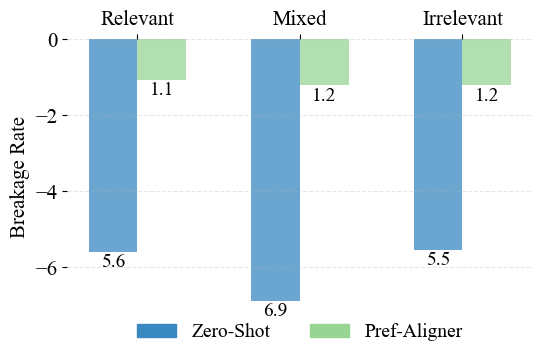

In [15]:
from results_helper import (
    aligner_improvement_hbarplot_full,
    aligner_improvement_hbarplot,
    aligner_improvement_vbarplot,
    PROMPT_METHODS_DICT,
    MODELS_SHORT_DICT
)

models = [
    "Llama-3.3-70B-Instruct-Turbo-Free",
]
metric="BR"
for model in models:
    data, order = results_dict.get_field_matrix(
        field=[metric],
        fixed_keys={
            "dataset": "full",
            "model": "Llama-3.3-70B-Instruct-Turbo-Free",
        },
        axis_keys=["relevance", "method"]
    )
    data = np.array(data)       # [fields x relevance x methods]
    print(data.shape)
    # Take the first 5
    # data = data[:, :4]
    # models_ref = MODELS[:4].copy()
    # data = np.stack([data[:, i] for i in [0, 1, 4, 7]], axis=1)
    data = np.stack([data[..., i] for i in [0, -1]], axis=-1)
    print(data.shape)       # [fields x models x methods]

    # aligner_improvement_hbarplot(
    #     data[0],
    #     methods=["direct", "aligner"],
    #     label_dict=PROMPT_METHODS_DICT,
    #     models=[RELEVANCE_DICT[r] for r in RELEVANCE],
    #     title=f"Aligner improvement {metric} for {MODELS_SHORT_DICT[model]}",
    #     xlabel=METRIC_LABELS[metric],
    #     figh=3,
    #     show=True,
    # )

    aligner_improvement_vbarplot(
        data[0],
        methods=["direct", "aligner"],
        label_dict=PROMPT_METHODS_DICT,
        models=[RELEVANCE_DICT[r] for r in RELEVANCE],
        title=f"Aligner improvement {metric} for {MODELS_SHORT_DICT[model]}",
        ylabel=METRIC_LABELS[metric],
        figh=4,
        show=True,
    )
